# Marketing campaign optimization

## *Otimizando as campanhas, seremos capazes de aumentar em quase 12% o faturamento final, ou seja, $150.000 dólares.*

### Importação de bibliotecas essenciais

In [3]:
# Importação de bibliotecas essenciais
import pandas as pd  # Manipulação de dados em DataFrames
import numpy as np  # Operações matemáticas e manipulação de arrays

# Bibliotecas de visualização de dados
import seaborn as sns  # Visualizações estatísticas
import matplotlib.pyplot as plt  # Visualizações estáticas
import plotly.graph_objects as go # Visualizações estáticas

# Configuração para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Configuração de localização para formatar números no padrão brasileiro
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')  # Configura a localização para o Brasil
format = lambda num: locale.format_string("%d", num, grouping=True)  # Formata números com separador de milhar

import warnings

# Importação de funções matemáticas específicas
from math import pi  # Utilizado para cálculos envolvendo o número pi

from scipy.stats import norm # Expectativas de crescimento

### Importação e visualização do dataset

In [4]:
df = pd.read_csv('data/df_with_clusters.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Year,Month,Day,Age,Recency,Complain,Children,FamilySize,IsMarried,SeniorityDays,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalMntSpent,TotalPurchases,AvgPurchaseValue,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedAnyCampaign,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,WebVsStorePurchases,Date,IncomeRange,Clusters
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,2012,9,4,57,58,0,0,0,0,663,635,88,546,172,88,88,1617,25,64,3,0,0,0,0,0,0,1,8,10,4,7,2,2012-09-04,41 Mil-61 Mil,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,2014,3,8,60,38,0,2,2,0,113,11,1,6,2,1,6,27,6,4,2,0,0,0,0,0,0,0,1,1,2,5,0,2014-03-08,41 Mil-61 Mil,3
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,2013,8,21,49,26,0,0,1,1,312,426,49,127,111,21,42,776,21,36,1,0,0,0,0,0,0,0,8,2,10,4,0,2013-08-21,61 Mil-82 Mil,3
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,2014,2,10,30,26,0,1,2,1,139,11,4,20,10,3,5,53,8,6,2,0,0,0,0,0,0,0,2,0,4,6,0,2014-02-10,21 Mil-41 Mil,2
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,2014,1,19,33,94,0,1,2,1,161,173,43,118,46,27,15,422,19,22,5,0,0,0,0,0,0,0,5,3,6,5,0,2014-01-19,41 Mil-61 Mil,2


### *Com base nos Clusters:*

# O que poderia ser feito para otimizar as campanhas?

L'analisi dei clusters ci ha permesso di paragonare in modo curato gruppi di clienti che sono in grado di rappresentare quasi perfettamente ognuno di loro

## Aceitação de Campanhas por Cluters:

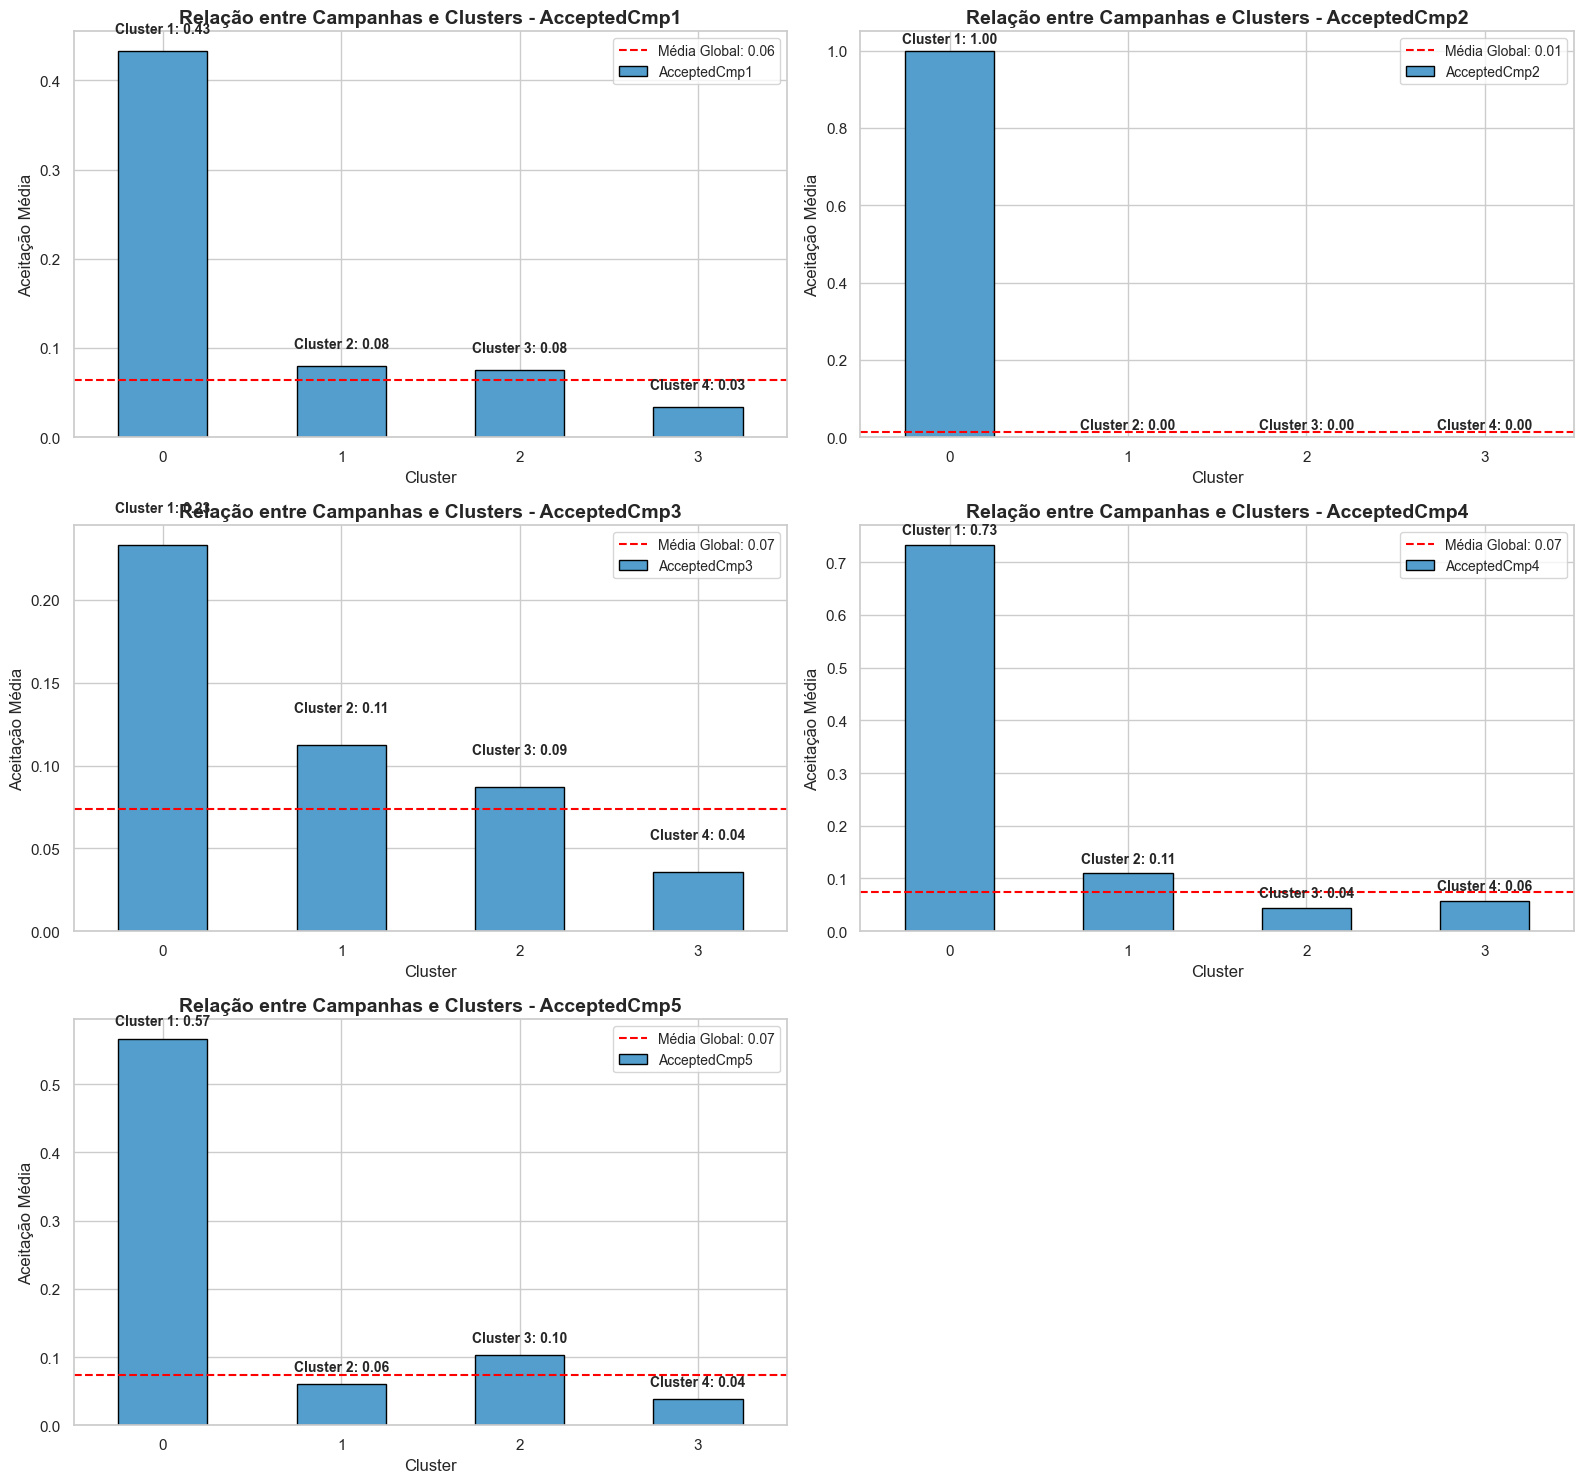

In [5]:
def marketing_campaign(df, title, col_list, cols=2):
    # Configurar o estilo do gráfico
    sns.set_theme(style="whitegrid")

    # Calcular o número de linhas necessário
    rows = -(-len(col_list) // cols)  # Arredondar para cima

    # Criar a figura e os subplots
    fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
    axes = axes.flatten()  # Achatar a matriz de subplots para fácil iteração

    for idx, col in enumerate(col_list):
        # Calcular os dados necessários
        media_global = df[col].mean()  # Média global
        media_por_grupo = df.groupby('Clusters')[col].mean()  # Média por grupo

        # Gráfico de barras no subplot atual
        ax = media_por_grupo.plot(
            kind='bar',
            color=sns.color_palette('Blues', n_colors=6)[3],
            edgecolor='black',
            ax=axes[idx]
        )

        # Adicionar os números em cima das barras
        for i, valor in enumerate(media_por_grupo):
            ax.text(
                i, valor + 0.02,  # Posição acima da barra
                f"Cluster {i+1}: {valor:.2f}",
                ha='center', fontsize=10, fontweight='bold'
            )

        # Adicionar linha pontilhada para a média global
        ax.axhline(y=media_global, color='red', linestyle='--', linewidth=1.5, label=f'Média Global: {media_global:.2f}')

        # Adicionar título e rótulos (em português)
        ax.set_title(f'{title} - {col}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Cluster', fontsize=12)
        ax.set_ylabel('Aceitação Média', fontsize=12)
        ax.legend(fontsize=10)
        ax.tick_params(axis='x', rotation=0)

    # Remover os eixos vazios (se houver)
    for j in range(len(col_list), len(axes)):
        fig.delaxes(axes[j])

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Lista de colunas
lista = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Chamar a função
marketing_campaign(df, 'Relação entre Campanhas e Clusters', lista, cols=2)

---

## Cálculo da Expectativas de crescimento

In [25]:
def growth_expectations(df, clusters, plot=True, prints=True, simulations=10000):
    # Filtrando o dataset com base nos Clusters
    cluster = df[df['Clusters'].isin(clusters)]

    # Calcular ticket médio e desvio padrão dos clusters 0 e 1
    ticket_medio = cluster['TotalMntSpent'].mean()
    desvio_padrao = cluster['TotalMntSpent'].std()

    # Número total de clientes na base
    total_clientes = len(df)

    # Calcular faturamento total real
    faturamento_real = df['TotalMntSpent'].sum()

    # Simulação de Monte Carlo
    n_simulacoes = simulations  # Número de simulações

    def simular_faturamento(n_clientes, ticket_medio, desvio_padrao):
        gastos_simulados = np.random.normal(loc=ticket_medio, scale=desvio_padrao, size=n_clientes)
        faturamento_simulado = gastos_simulados.sum()
        return faturamento_simulado

    # Executar simulações
    resultados_simulacao = [
        simular_faturamento(total_clientes, ticket_medio, desvio_padrao)
        for _ in range(n_simulacoes)
    ]

    # Resultados
    faturamento_medio = np.mean(resultados_simulacao)
    faturamento_intervalo = (np.percentile(resultados_simulacao, 2.5), np.percentile(resultados_simulacao, 97.5))

    # Calcular a diferença entre o faturamento real e o simulado
    diferenca_faturamento = faturamento_medio - faturamento_real
    diferenca_percentual = (diferenca_faturamento / faturamento_real) * 100

    if plot == True:
        # Visualizar distribuição das simulações
        plt.figure(figsize=(10, 6))
        sns.histplot(resultados_simulacao, kde=True, bins=50, color='blue')
        plt.axvline(faturamento_medio, color='red', linestyle='--', label=f'Média Simulada: ${faturamento_medio:,.2f}')
        plt.axvline(faturamento_intervalo[0], color='green', linestyle='--', label=f'2.5%: ${faturamento_intervalo[0]:,.2f}')
        plt.axvline(faturamento_intervalo[1], color='green', linestyle='--', label=f'97.5%: ${faturamento_intervalo[1]:,.2f}')
        plt.title(f'Distribuição Simulada do Faturamento Total com os Clusters: {str(clusters).replace("[", "(").replace("]", ")")}:\n')
        plt.xlabel('Faturamento Total ($)')
        plt.ylabel('Frequência')
        plt.legend()

        # Adicionar texto com a diferença percentual no gráfico
        plt.text(
            faturamento_medio, 
            plt.ylim()[1] * 0.8, 
            f"Diferença: {diferenca_percentual:+.2f}%", 
            color='black', 
            fontsize=12, 
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )
        plt.show()

    if prints == True:
        # Exibir resultados
        print(f'Distribuição Simulada do Faturamento Total com os Clusters: {str(clusters).replace("[", "(").replace("]", ")")}:\n')
        print(f"Faturamento Total Real: ${faturamento_real:,.2f}")
        print(f"Faturamento Médio Simulado: ${faturamento_medio:,.2f}\n")
        print(f"Diferença entre Faturamento Simulado e Real: ${diferenca_faturamento:,.2f}")
        print(f"Diferença Percentual: {diferenca_percentual:+.2f}%")
        print(f"Intervalo de Confiança (95%): ${faturamento_intervalo[0]:,.2f} - ${faturamento_intervalo[1]:,.2f}")

# Simulação de Faturamento:

## Caso as campanhas fossem direcionadas exclusivamente aos clientes com maior potencial de retorno.

In [7]:
growth_expectations(df, [0, 1], plot=False)

Distribuição Simulada do Faturamento Total com os Clusters: (0, 1):

Faturamento Total Real: $1,335,799.00
Faturamento Médio Simulado: $1,731,484.91

Diferença entre Faturamento Simulado e Real: $395,685.91
Diferença Percentual: +29.62%
Intervalo de Confiança (95%): $1,680,730.00 - $1,782,819.21


### *O faturamento final apresentaria um aumento de $390,000.00 dólares, representando um crescimento de aproximadamente 30%*

### Gráfico da extimativa:

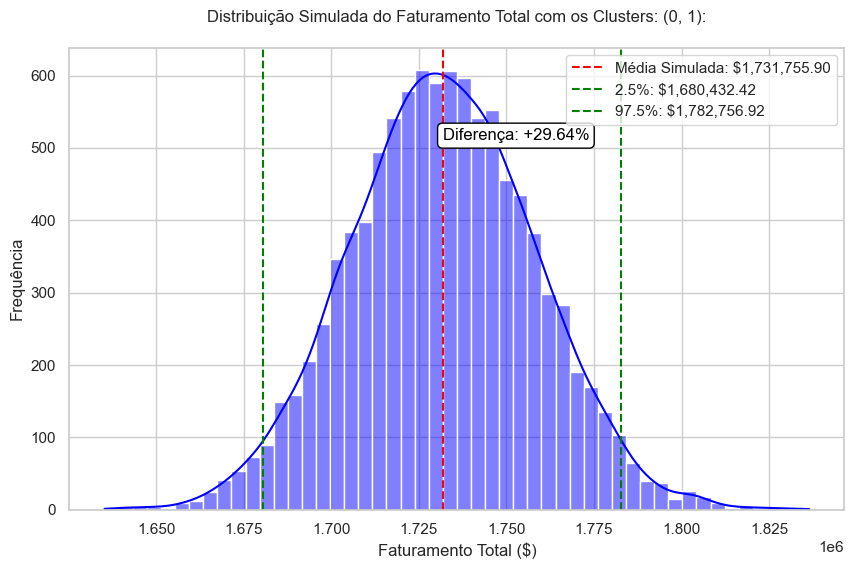

In [26]:
growth_expectations(df, [0, 1], prints=False)

## Qual seria o impacto no faturamento caso perdêssemos os clientes com maior potencial de retorno?

*Simulação sem o Cluster 0:*
### A ausência do Cluster 0 resultaria em uma perda estimada de $20 mil dólares:

In [9]:
growth_expectations(df, [1, 2, 3], plot=False)

Distribuição Simulada do Faturamento Total com os Clusters: (1, 2, 3):

Faturamento Total Real: $1,335,799.00
Faturamento Médio Simulado: $1,314,879.76

Diferença entre Faturamento Simulado e Real: $-20,919.24
Diferença Percentual: -1.57%
Intervalo de Confiança (95%): $1,261,251.11 - $1,371,317.89


*Simulação sem o Cluster 1:*
### A ausência do Cluster 1 resultaria em uma perda estimada de $90 mil dólares:

### *Considerando que, desde o final de 2013, esse cluster apresentou uma queda acentuada, esse cenário não seria irreal ou apenas teórico.*

In [10]:
growth_expectations(df, [0, 2, 3], plot=False)

Distribuição Simulada do Faturamento Total com os Clusters: (0, 2, 3):

Faturamento Total Real: $1,335,799.00
Faturamento Médio Simulado: $1,240,174.32

Diferença entre Faturamento Simulado e Real: $-95,624.68
Diferença Percentual: -7.16%
Intervalo de Confiança (95%): $1,183,653.59 - $1,296,968.08


*Simulação sem os Clusters 0 e 1:*
### A ausência dos Clusters 0 e 1 resultaria em uma perda estimada de $90 mil dólares:

### *No último ano, observamos uma redução tanto nos clusters com maior retorno quanto naqueles com menor retorno.*
### *Caso as campanhas permaneçam inalteradas, a perda pode atingir $120 mil dólares, representando 9,35% do faturamento total.*

In [11]:
growth_expectations(df, [2, 3], plot=False)

Distribuição Simulada do Faturamento Total com os Clusters: (2, 3):

Faturamento Total Real: $1,335,799.00
Faturamento Médio Simulado: $1,210,771.98

Diferença entre Faturamento Simulado e Real: $-125,027.02
Diferença Percentual: -9.36%
Intervalo de Confiança (95%): $1,155,593.90 - $1,266,192.96


### Gráfico da extimativa:

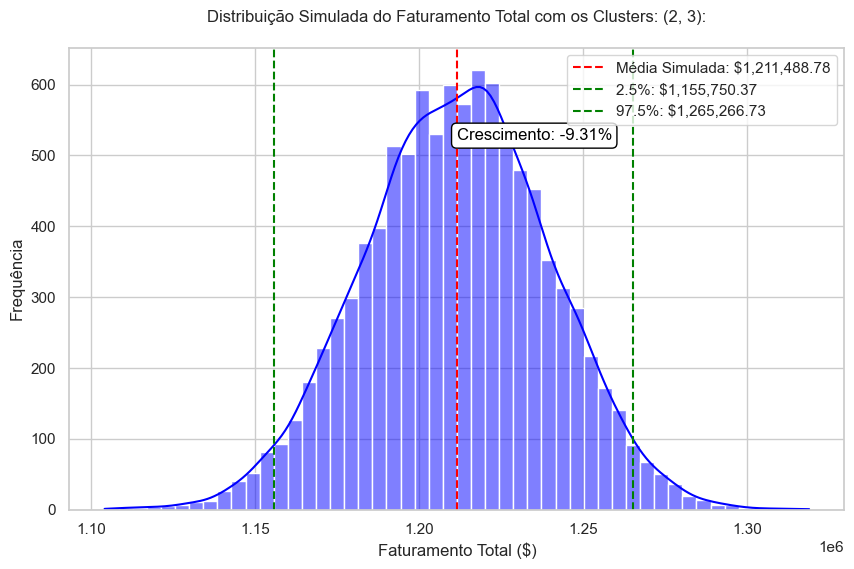

In [24]:
growth_expectations(df, [2, 3], prints=False)

## E se removêssemos apenas o Cluster 2, considerando que ele é o que gera o menor retorno?

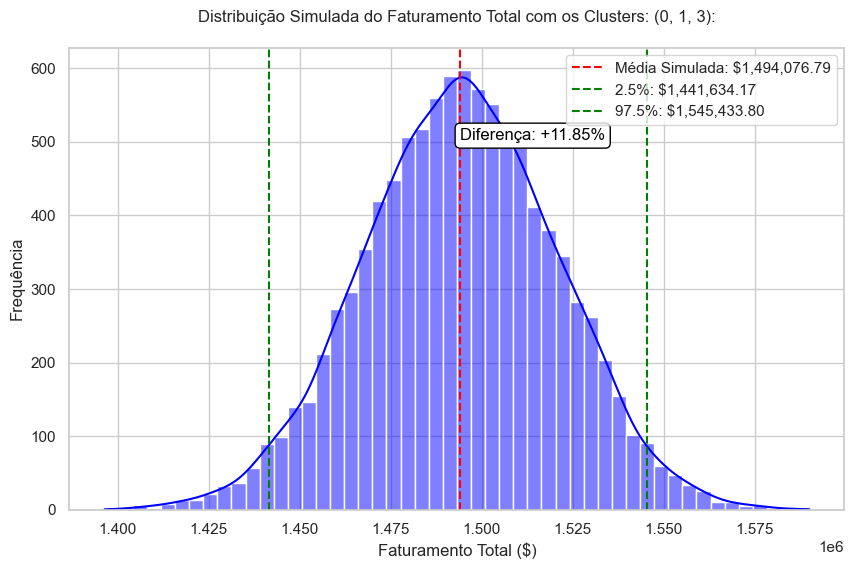

Distribuição Simulada do Faturamento Total com os Clusters: (0, 1, 3):

Faturamento Total Real: $1,335,799.00
Faturamento Médio Simulado: $1,494,076.79

Diferença entre Faturamento Simulado e Real: $158,277.79
Diferença Percentual: +11.85%
Intervalo de Confiança (95%): $1,441,634.17 - $1,545,433.80


In [13]:
growth_expectations(df, [0, 1, 3])

# Campanhas de Marketing

## Que tipos de clientes as campanhas de marketing devem analisar?

---

### **Perfis de Clientes e Impacto nos Resultados da Plataforma**  

#### **1. Perfil dos Melhores Clientes**  
Os clientes mais valiosos para a plataforma possuem características que demonstram maior estabilidade financeira, educação avançada e hábitos familiares que favorecem o consumo consistente. Veja os detalhes:  

- **Faixa etária:** A partir dos 40 anos, com desempenho ideal entre 40 e 58 anos. Essa faixa reflete uma fase de maior estabilidade de vida, tanto financeira quanto pessoal.  
- **Renda:** Entre $42.000 e $80.000 anuais. Este grupo tem poder de compra significativo, garantindo um ticket médio elevado.  
- **Configuração familiar:**  
  - Melhor desempenho observado em famílias com dois filhos.  
  - Pelo menos um filho adolescente. 
  - Preferencialmente sem filhos em idade infantil, possivelmente por uma mudança de prioridades no consumo.  
- **Escolaridade:** Profissionais com Mestrado ou PhD, indicando maior qualificação.  
- **Estado civil:** Tendem a estar em relacionamentos casuais, divorciados ou viúvos. Esses estados civis podem representar maior autonomia financeira e decisão de compra.  

#### **2. Perfil dos Piores Clientes**  
Por outro lado, os clientes com menor retorno possuem características que limitam seu poder de compra e impacto na plataforma:  

- **Faixa etária:** Abaixo dos 40 anos, faixa marcada por instabilidade financeira e prioridades menos alinhadas ao consumo constante.  
- **Renda:** Inferior a $42.000 anuais, refletindo um poder aquisitivo mais restrito.  
- **Configuração familiar:**  
  - Famílias com apenas um filho, geralmente crianças.  
  - A ausência de filhos adolescentes pode estar relacionada a uma menor necessidade ou interesse em certos produtos ou serviços.  
- **Escolaridade:** Ensino básico ou médio, indicando menor capacidade de investimento em produtos de maior valor agregado.  
- **Estado civil:** Predominantemente solteiros ou casados. Solteiros podem priorizar outros tipos de consumo, enquanto casados podem estar mais focados em gastos essenciais.  

---

### **Comparação dos Perfis**  
| **Características**          | **Melhores Clientes**              | **Piores Clientes**             |  
|-------------------------------|------------------------------------|---------------------------------|  
| **Idade**                     | 40 a 58 anos                      | Abaixo de 40 anos              |  
| **Renda**                     | $42.000 a $80.000                 | Menos de $42.000               |  
| **Filhos (Adolescentes)**     | Pelo menos 1                      | Nenhum                         |  
| **Filhos (Crianças)**         | Nenhum                            | 1 ou 2                         |  
| **Escolaridade**              | Mestrado ou PhD                   | Ensino básico ou médio         |  
| **Estado civil**              | Ficando, divorciado ou viúvo      | Solteiro ou casado             |  

---

### **Observações Finais**  
Os melhores clientes apresentam um perfil mais maduro e economicamente estável, o que resulta em maior retorno financeiro e fidelidade à plataforma. Já os piores clientes, embora representem uma parte importante da base de usuários, possuem características que limitam sua contribuição direta aos resultados da plataforma.  

Essa análise reforça a necessidade de campanhas segmentadas, priorizando o perfil dos melhores clientes e adaptando estratégias para atrair novos usuários com características semelhantes.

## Como deveriam ser essas campanhas? - Conexão emocional com o público-alvo

---

### **Campanha Publicitária: "Nunca é Tarde para o Amor"**  

#### **Conceito Principal**  
A campanha deve destacar a mensagem de que o amor, a celebração da vida e os pequenos luxos não têm idade, conectando isso ao estilo de vida dos melhores clientes. Essa narrativa associa os produtos da plataforma a momentos especiais e prazerosos.  

#### **Slogan Refinado**  
- "Para o amor, o tempo é apenas um detalhe."  
- "Celebre o amor, o sabor e a vida em qualquer idade."  

#### **Visual da Publicidade**  
**1. Cenário:**  
- Um jantar elegante em um ambiente acolhedor, sofisticado, com iluminação quente (velas ou uma luz dourada suave).  
- Mesa decorada com uma garrafa de vinho de destaque, taças cristalinas, pratos refinados e uma composição de carnes e acompanhamentos gourmet.  

**2. Personagens:**  
- Um casal na faixa dos 40 a 58 anos, representando diferentes perfis do público-alvo (ex.: um casal interracial ou pessoas com características mais inclusivas).  
- Ambos bem vestidos: ela com joias de ouro discretas e elegantes (brincos ou colar); ele com um relógio clássico ou um anel de ouro.  

**3. Momento Capturado:**  
- Uma troca de olhares cheia de conexão e intimidade, ou um brinde com sorrisos genuínos, transmitindo felicidade e leveza.  

#### **Mensagem da Publicidade**  
- Texto principal:  
  "Nunca é tarde para brindar aos momentos que realmente importam. Experimente o sabor da vida com quem faz seu coração bater mais forte."  
- Chamada para ação:  
  "Descubra nossos vinhos e crie momentos inesquecíveis." 

### **Estratégias de Marketing Complementares**  

#### **1. Vendas Cruzadas (Cross-Selling):**  
Aproveite o momento de compra de vinhos para sugerir produtos complementares diretamente relacionados.  

- **Exemplo na Plataforma:**  
  - Ao selecionar um vinho premium, sugerir cortes nobres de carne que harmonizem perfeitamente com a bebida, como "Filé Mignon" ou "Picanha Angus".  
  - Inserir na página do vinho uma seção com joias discretas, como anéis ou brincos de ouro, com a mensagem: *"Complete a ocasião com um toque de elegância."*  

- **Texto Promocional:**  
  "Escolha o vinho ideal e descubra as combinações perfeitas para transformar seu jantar em uma experiência inesquecível."  

---

#### **2. Vendas Complementares (Upselling):**  
Incentive os clientes a optarem por versões mais sofisticadas ou pacotes exclusivos que agreguem mais valor.  

- **Exemplo na Plataforma:**  
  - Sugestão de vinhos de safras especiais ou edições limitadas com descrições que destacam sua exclusividade e sabor superior.  
  - Para carnes, oferecer cortes maturados ou pacotes que incluam temperos gourmet como complemento.  

- **Texto Promocional:**  
  "Eleve seu jantar a um nível superior com rótulos exclusivos e cortes premium especialmente selecionados."  

---

#### **3. Bundle (Agrupamento de Produtos):**  
Crie pacotes promocionais que incluam vinhos, carnes e joias, oferecendo um preço atrativo.  

- **Exemplo de Kit Promocional:**  
  - **Kit "Jantar Romântico Premium":**  
    - 1 garrafa de vinho premium.  
    - 1 corte nobre de carne.  
    - 1 peça de joia em ouro (anel ou brinco).  
  - **Preço Promocional:** Inclua uma mensagem clara sobre a economia, como "Economize 20% com este kit exclusivo."  

- **Texto Promocional:**  
  "Tudo o que você precisa para um momento inesquecível em um só lugar. Escolha o Kit Jantar Romântico Premium."   

## Podemos ir além?

### **Roteiro para o Vídeo: "Nunca é Tarde para Encontrar o Verdadeiro Amor"**

#### **Cena 1: O Encontro e o Início do Amor**  
- **Local:** Faculdade, anos atrás.  
- **Ação:** O vídeo começa com uma cena suave de dois jovens se conhecendo na faculdade, trocando olhares durante uma aula. Eles parecem inseparáveis, caminhando juntos pelos corredores, se formando e criando uma vida juntos.  
- **Trilha sonora:** Música suave e romântica, transmitindo a ideia de um amor jovem e promissor.  

**Texto na tela:**  
_"O amor pode começar de uma forma simples, em um momento que parece ser o único que importa."_

#### **Cena 2: A Formação da Família**  
- **Local:** Casa familiar, anos depois.  
- **Ação:** O casal agora tem dois filhos – um adolescente e uma criança. Eles estão celebrando uma refeição juntos, rindo e compartilhando bons momentos em torno de uma mesa com vinho e carne. É um cenário familiar, com uma sensação de realização, mas também com um toque de melancolia, indicando que algo está por vir.  
- **Trilha sonora:** Música suave, mas com uma melodia mais melancólica.  

**Texto na tela:**  
_"A vida segue seu curso, com filhos, responsabilidades, e mudanças..."_

#### **Cena 3: A Separação**  
- **Local:** Cena no escritório de um advogado ou em uma conversa no fim de um dia, com o casal se separando de forma amigável.  
- **Ação:** A separação é mostrada de forma sutil e respeitosa, sem drama exagerado, mas com a clara percepção de que ambos seguiram caminhos diferentes. Um dos personagens fica pensativo, olhando para fotos antigas da família.  
- **Trilha sonora:** Mudança para uma música mais introspectiva, com notas de despedida, mas também de esperança.  

**Texto na tela:**  
_"Às vezes, o amor precisa de uma pausa para que possamos nos redescobrir."_

#### **Cena 4: O Novo Início**  
- **Local:** Anos depois, em um ambiente tranquilo e sofisticado, como um restaurante elegante ou uma mesa de jantar em casa.  
- **Ação:** O personagem, agora entre 40 e 58 anos, aparece sozinho, tomando uma taça de vinho. Ele recebe uma mensagem de texto de um amigo ou um telefonema com boas notícias sobre um novo encontro ou uma nova oportunidade de recomeçar a vida amorosa. Ele sorri, sereno, com um toque de confiança.  
- **Trilha sonora:** A música ganha uma tonalidade mais positiva, refletindo esperança e recomeço.  

**Texto na tela:**  
_"Nunca é tarde para se apaixonar de novo e celebrar os momentos que realmente importam."_

#### **Cena 5: O Verdadeiro Amor**  
- **Local:** Jantar íntimo e elegante, com a nova pessoa, com uma mesa decorada com vinho, carnes e produtos de ouro (joias).  
- **Ação:** O casal agora mais maduro está compartilhando uma refeição sofisticada, brindando à vida e ao amor, com risos e troca de olhares emocionados.  
- **Trilha sonora:** Música de celebração, com uma sensação de conquista e alegria.  

**Texto na tela:**  
_"O amor sempre encontra seu caminho. E quando encontramos o verdadeiro, cada momento se torna especial."_

#### **Cena Final: Call-to-Action**  
- **Local:** A imagem final é um close em uma taça de vinho sendo erguida para um brinde.  
- **Texto na tela:**  
  "Descubra os vinhos, carnes e joias que tornam seu jantar inesquecível. Celebre o amor, a vida e as novas oportunidades."  
  "Nunca é tarde para celebrar o amor com quem você realmente merece."  

**Call-to-action:** "Explore nossa seleção exclusiva para transformar seus momentos especiais."

---

### **Estratégia de Divulgação do Vídeo**  

1. **Redes Sociais:**  
   - Postar o vídeo no Instagram, Facebook e TikTok, destacando a conexão emocional e o apelo visual de vinhos, carnes e joias. Use hashtags como #NuncaÉTarde #AmorSemIdade #CelebreOAmor.  
   - Criar teasers do vídeo para gerar curiosidade antes do lançamento completo.

2. **E-mail Marketing:**  
   - Enviar o vídeo para os clientes da plataforma, incluindo um link direto para os produtos mencionados no vídeo (vinhos, carnes e joias).  

3. **Landing Page e Promoções:**  
   - Criar uma página de aterrissagem com o vídeo, oferecendo descontos especiais em vinhos, carnes e joias. Ofereça bundles de produtos relacionados para os clientes que assistiram ao vídeo.  

---

### **Objetivo da Campanha:**  
Esse vídeo não só conta uma história emocional que conecta diretamente com o público-alvo, mas também promove os produtos de forma natural, associando-os aos momentos mais significativos da vida (jantares românticos, recomeços e celebrações de amor). Isso cria um vínculo emocional e um desejo de compra, reforçando a exclusividade e a sofisticação dos produtos da plataforma.

---

<img src="https://media.licdn.com/dms/image/v2/D4D03AQGKyH2VYxJFNw/profile-displayphoto-shrink_200_200/B4DZR3AMiKHkAc-/0/1737163329100?e=1742428800&v=beta&t=g3jnt105dxEQvOyv2XAy6EJjviKfFrw1yH61s28JqYk" alt="capa" width="100">

#### [Enzo Schitini](www.linkedin.com/in/enzoschitini)
#### Data Scientist & Data Analyst • Senior Bubble Developer • SQL • Ux/Ui Design 
[*@ Scituffy Founder*](https://scituffy.bubbleapps.io/version-test/index/home)